In [1]:
from pandas import *
import pandas as pd
import numpy as np
import re
import sys
import matplotlib.pyplot as plt
import datetime as dt

today = dt.date.today().strftime("%Y%m%d")
import math
pd.set_option("display.max_columns", 30)
pd.set_option("display.max_rows", 10)
import statsmodels.api as sm

from scipy import stats
import os 


In [17]:
df = pd.read_excel('C:/Users/jiaqil/Desktop/Things/credit_risk/development_sample.xlsx')
df=df.rename(columns=lambda x:x.strip())

# Replace All Missing Data by numpy.nan

In [18]:
def findnull(df,lst):
    for i in lst:
        df[i]=df[i].replace('-',np.NaN)
        df[i]=df[i].replace('N\A',np.NaN)
        df[i]=df[i].replace('',np.NaN)
        df[i]=df[i].replace(np.NaN,np.NaN)
    return df
    
    
df1=findnull(df,list(df.columns.values))

In [43]:
def replacechar(df):
    for i in list(df.columns.values):
        try:
            df[i]=df[i].apply(lambda x: str(x).replace("-",'~'))
        except:
            pass
    return df
df1= replacechar(df1)

# Create a Data Copy CSV File to Reduce the Size & IO Time

In [31]:
df1.to_csv("C:/Users/jiaqil/Desktop/Things/credit_risk/development_test.csv",index=False)

In [3]:
df1=pd.read_csv("C:/Users/jiaqil/Desktop/Things/credit_risk/development_test.csv")

C:\Users\jiaqil\AppData\Local\Continuum\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2723: DtypeWarning: Columns (12,47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Check Which Columns Have Over a Half of Missing Values

In [173]:
#CHECK FEATURE DATA COMPLETENESS 
def miss_data_column(df,lst):
    col=[]
    for i in lst:
        num = df[i].isnull().sum()
        if float(num/len(df))>0.5:
            col.append(i)
    return col

dropcol1 = miss_data_column(df1,list(df1.columns.values))
dropcol1

['MNTH_SINCE_LAST_APP_R',
 'DIF_INCOME_LAST_180DAY_R',
 'DIF_RESPERIOD_LAST_180DAY_R',
 'DIF_PERIOD_LAST_180DAY_R',
 'FIRST_DEALNO_LAG']

# Check Which Columns Have Same Value All the Time

In [79]:
def same_value_column(df,lst):
    col=[]
    for i in lst:
        if len(df[i].unique())==1:
            col.append(i)
    return col

dropcol2 =same_value_column(df1,list(df1.columns.values))
dropcol2

In [177]:
df1['DDATE']=df1['DDATE'].apply(lambda x: x.replace('~','/'))
df1['DDATE']=pd.to_datetime(df1['DDATE'])

In [4]:
df1

,TARGET,ID2,LOYALTY_STATUS,WEEK_DAY,DDATE,SOCIAL_STATUS,HOUR,AGE_RANGE,EDUCATION,COMPFIELD,APPFAMILYSTATUS,COMPSTAFFQNTY,APPWPERIOD_R2,APPCHILDQNTY,CONTACT_IN_BL,...,DIF_TP_LAST_90DAY_G2,PC_ACTIVE,DAYS_FROM_LAST_PAPER_RANGE,DIF_3PESTEL_LAST_180DAY,DIF_3PESTEL_LAST_180DAY_G2,DIF_CELLTEL_ALLPERIOD,DIF_INN_BY_CELLTEL_ALLPERIOD,DIF_INN_BY_CELLTEL_LAST_30_,DIF_CNT_SPEC_ALLPERIOD,DIF_INN_CNT_ALLPERIOD,DIF_INN_BY_3PERTEL_ALLPERIOD,DIF_INN_BY_HOMETEL_ALLPERIOD,FIRST_DEALNO_LAG,DIF_INN_BY_COMPTEL_LAST_180_,DIF_INN_BY_COMPTEL_LAST_30_
0,0.0,1,0,1,2004~12~01,wage worker,11,40~44,upper~secondary,2.0,1,>50,>5,1~3,0,...,0,1,0,0,0,0,0,0,0,0,0,1,NaN,0,0
1,1.0,2,0,6,2004~12~01,self~emplyed,13~17,>54,upper~secondary,1.0,2,1,>5,0,0,...,0,NaN,NaN,0,0,0,0,0,0,0,1,0,NaN,0,0
2,0.0,3,0,1,2004~12~01,wage worker,13~17,35~39,upper~secondary,2.0,4,1,>5,0,0,...,0,NaN,NaN,0,0,0,0,0,0,0,0,0,NaN,0,0
3,0.0,4,0,5,2004~12~01,self~emplyed,11,26~29,secondary,12.0,1,1,>5,0,0,...,0,NaN,NaN,0,0,0,0,0,0,0,0,2,NaN,0,0
4,0.0,5,0,4,2004~12~01,self~emplyed,>18,40~44,upper~secondary,4.0,1,1,>5,1~3,1,...,0,>1,0,1,>0,0,0,0,3,0,0,1,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297892,0.0,297893,1,3,2004~08~01,own business,>18,21~25,upper~secondary,4.0,1,1,NaN,1~3,0,...,0,1,>1,0,0,0,0,0,2,0,1,1,>6,0,0
297893,0.0,297894,0,4,2004~08~01,maternity leave,10,21~25,unfinished higher,12.0,1,1,NaN,1~3,0,...,0,NaN,NaN,0,0,0,0,0,0,0,0,1,NaN,0,0
297894,0.0,297895,1,5,2004~08~01,pensioner,12,>54,upper~secondary,12.0,1,1,NaN,0,0,...,0,>1,0,0,0,0,0,0,3,0,0,0,>6,0,0
297895,0.0,297896,0,4,2004~08~01,self~emplyed,13~17,35~39,secondary,8.0,1,1,NaN,>3,0,...,0,1,0,0,0,0,0,0,0,0,0,0,NaN,0,0


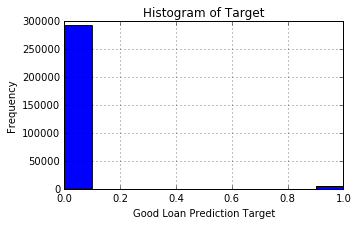

In [134]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 5,3
df1['TARGET'].hist()
plt.title('Histogram of Target')
plt.xlabel('Good Loan Prediction Target')
plt.ylabel('Frequency')

In [139]:
df1['TARGET'].value_counts()
print("Target 1 Percentage:", float(5398/len(df1)))
print("Target 0 Percentage:", 1-float(5398/len(df1)))

Target 1 Percentage: 0.018120357036156793
Target 0 Percentage: 0.9818796429638432


# Potential Problem:  if we predict all values by 0, the accuracy will be as high as 0.9818796

In [132]:
df1['SOCIAL_STATUS'].value_counts()

wage worker         209481
pensioner            27571
own business         21580
self~emplyed         18953
civil service        11948
maternity leave       6270
military service      2010
student                 72
dependent                6
unemployed               6
Name: SOCIAL_STATUS, dtype: int64

# Remove Missing Value Columns & Date(can't tranform to such as loan time., etc. ) & ID columns

In [178]:
dropcol1.append('DDATE')
dropcol1.append('ID2')

In [179]:
df = df1.drop(dropcol1,axis=1)

In [180]:
df=df.dropna()

In [182]:
#textcol= [i for i in df.columns.values if df[i].dtypes==object]
def replacechar(df):
    for i in list(df.columns.values):
        try:
            df[i]=df[i].apply(lambda x: str(x).replace("~",'-'))
        except:
            pass
    return df
df= replacechar(df)

# Deal with Object Variables (Numerical coding: LabelEncoder & On Hot Encoding)

In [187]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in df.columns.values:
    if df[i].dtypes==object:
        #print(i)
        data = df[i].astype('str')
        le.fit(data.values)
        df[i] = le.transform(df[i])

In [188]:
def tweakcol1(x):
    if int(x)<8:
        return x+1
    else:
        return 0

def tweakcol2(x):
    if int(x)>=2:
        return 2
    else:
        return 0

df['AGE_RANGE']=df['AGE_RANGE'].apply(lambda x: tweakcol1(x))
df['APPCHILDQNTY']=df['APPCHILDQNTY'].apply(lambda x: tweakcol2(x))

In [196]:
df.to_csv("C:/Users/jiaqil/Desktop/Things/credit_risk/development_encode.csv",index=False)

In [2]:
df = pd.read_csv("C:/Users/jiaqil/Desktop/Things/credit_risk/development_encode.csv")

# On Hot Encoding / Dummy Variables

In [3]:
var_to_encode=['WEEK_DAY','SOCIAL_STATUS','EDUCATION','LOYALTY_STATUS']

df2 = pd.get_dummies(df, columns=var_to_encode)

In [4]:
df2

,TARGET,HOUR,AGE_RANGE,COMPFIELD,APPFAMILYSTATUS,COMPSTAFFQNTY,APPWPERIOD_R2,APPCHILDQNTY,CONTACT_IN_BL,DIF_CELLTEL_LAST_180DAY,DIF_CHILDQNTY_LAST_180DAY,DIF_COMPTEL_LAST_180DAY,DIF_COMPTEL_LAST_180DAY_G2,DIF_CONT_SS_LAST_180DAY,DIF_EDRPOU_LAST_180DAY,...,SOCIAL_STATUS_4,SOCIAL_STATUS_5,SOCIAL_STATUS_6,SOCIAL_STATUS_7,SOCIAL_STATUS_8,SOCIAL_STATUS_9,EDUCATION_0,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,LOYALTY_STATUS_0,LOYALTY_STATUS_1
0,0,2,5,4,0,2,5,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0,7,5,6,0,0,5,0,1,0,0,1,1,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,1,2,7,8,0,2,5,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0,2,8,3,4,0,5,0,1,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0,3,4,4,0,1,5,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224857,0,2,2,3,0,0,4,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
224858,0,4,6,0,0,1,4,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
224859,0,7,3,5,1,1,4,0,0,1,0,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
224860,0,4,3,4,2,1,4,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


# Check Columns Value Distribution & Frequency

In [37]:
#GET BASIC DATA(ENCODED) DISTRIBUTION FOR EACH COLUMN 
def coldistribution(df):
    table=[]
    for i in df.columns.values:
        lst = df[i].unique()
        for j in lst:
            count = list(df[i]).count(j)
            table.append([i,j,float(count/len(df))])
    return pd.DataFrame(table, columns=['Column','Column_Code','Percent'])

In [38]:
table= coldistribution(df)
table
#table.to_csv("C:/Users/jiaqil/Desktop/Things/credit_risk/distribution_table.csv",index=False)

,Column,Column_Code,Percent
0,TARGET,0,0.989700
1,TARGET,1,0.010300
2,LOYALTY_STATUS,0,0.505626
3,LOYALTY_STATUS,1,0.494374
4,WEEK_DAY,0,0.172661
...,...,...,...
229,DIF_INN_BY_COMPTEL_LAST_180_,3,0.025945
230,DIF_INN_BY_COMPTEL_LAST_180_,2,0.048456
231,DIF_INN_BY_COMPTEL_LAST_30_,0,0.852558
232,DIF_INN_BY_COMPTEL_LAST_30_,2,0.070403


# Features Correlation Test & Heatmap

In [24]:
corelation = pd.DataFrame(df.corr())
#df.corr().to_csv("C:/Users/jiaqil/Desktop/Things/credit_risk/correlation.csv")
absvalue=lambda x: abs(x)
corfeature= list(pd.DataFrame(corelation['TARGET']).applymap(absvalue).sort(columns='TARGET',ascending=False).iloc[1:46,].index)

C:\Users\jiaqil\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


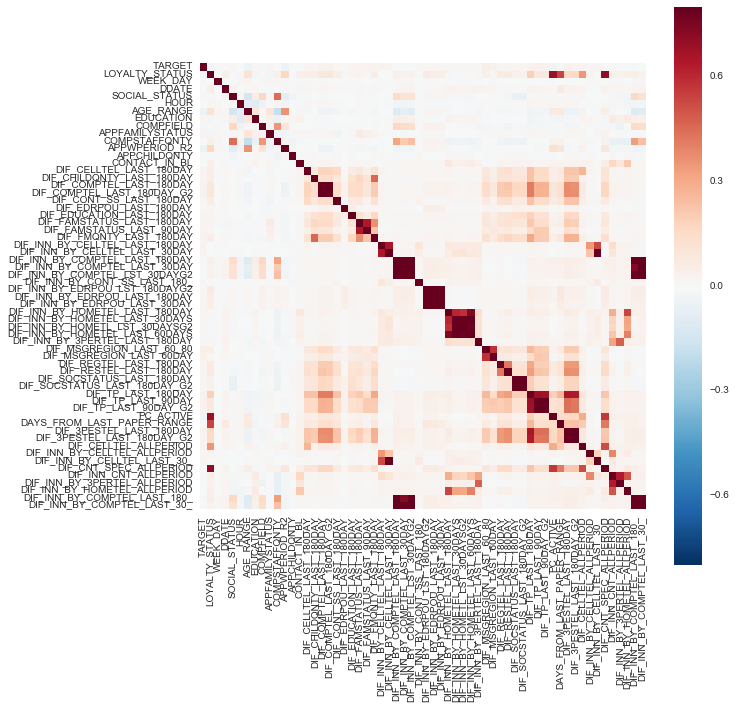

In [165]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,10
#%matplotlib
corrmat = df.corr()
sns.heatmap(corrmat, vmax=.8, square=True)
sns.plt.show()

In [25]:
corr_matrix = df.corr().abs()

#Get Highly Correlated Features
#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)
corpair = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                 .stack()
                 .order(ascending=False))

C:\Users\jiaqil\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: FutureWarning: order is deprecated, use sort_values(...)


In [27]:
pd.DataFrame(corpair).to_csv("C:/Users/jiaqil/Desktop/Things/credit_risk/correlation.csv")

# Remove Highly Correlated Features

In [5]:
corrlist=[i for i in df.columns.values if 'G2' in i]
corrlist.append('DIF_INN_BY_COMPTEL_LAST_180_')
corrlist.append('DIF_INN_BY_COMPTEL_LAST_30_')
corrlist.append('DIF_INN_BY_COMPTEL_LAST_30DAY')
corrlist.append('DIF_INN_BY_CELLTEL_LAST_30_')
corrlist.append('DIF_INN_BY_HOMETEL_LAST_30DAYS')

In [6]:
corrlist

['DIF_COMPTEL_LAST_180DAY_G2',
 'DIF_INN_BY_COMPTEL_LST_30DAYG2',
 'DIF_INN_BY_EDRPOU_LST_180DAYG2',
 'DIF_INN_BY_HOMETL_LST_30DAYSG2',
 'DIF_SOCSTATUS_LAST_180DAY_G2',
 'DIF_TP_LAST_90DAY_G2',
 'DIF_3PESTEL_LAST_180DAY_G2',
 'DIF_INN_BY_COMPTEL_LAST_180_',
 'DIF_INN_BY_COMPTEL_LAST_30_',
 'DIF_INN_BY_COMPTEL_LAST_30DAY',
 'DIF_INN_BY_CELLTEL_LAST_30_',
 'DIF_INN_BY_HOMETEL_LAST_30DAYS']

In [7]:
df = df.drop([i for i in corrlist if i in df],axis=1)

# Split the Data to Train and Test (80% / 20%) 

In [8]:
df['Test']=np.random.choice([0, 1], size=(len(df),), p=[0.2, 0.8])
train = df[df['Test']==1]
target = train[['TARGET']]
train= train.loc[:, list(set(df.columns.values)-set(['TARGET','Test']))]

df2['Test']=np.random.choice([0, 1], size=(len(df),), p=[0.2, 0.8])
train2 = df2[df2['Test']==1]
target2 = train2[['TARGET']]
train2= train2.loc[:, list(set(df2.columns.values)-set(['TARGET','Test']))]


# RFE FEATURE SELECTION

In [9]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# create a base classifier used to evaluate a subset of attributes
model = LogisticRegression()
# create the RFE model and select 45 attributes
rfe = RFE(model, 60)
rfe = rfe.fit(train2, target2)
# summarize the selection of the attributes
#print(rfe.support_)
#print(rfe.ranking_)

#rfefeature

C:\Users\jiaqil\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [11]:
rfefeature = [i for (i, v) in zip(list(train2.columns.values), list(rfe.support_)) if v]

# KBEST FEATURE SELECTION

In [9]:
from sklearn.feature_selection import SelectKBest, f_classif
model = SelectKBest(score_func=f_classif,k=60)
model = model.fit(train2, target2)
#print(model.get_support())
kbestfeature = [i for (i, v) in zip(list(train2.columns.values), list(model.get_support())) if v]

C:\Users\jiaqil\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [10]:
kbestfeature

['DIF_CHILDQNTY_LAST_180DAY',
 'APPFAMILYSTATUS',
 'DIF_INN_BY_COMPTEL_LAST_180DAY',
 'DIF_INN_BY_HOMETEL_LAST_30DAYS',
 'EDUCATION_4',
 'DIF_INN_BY_CELLTEL_LAST_30DAY',
 'DIF_TP_LAST_90DAY_G2',
 'DIF_INN_BY_HOMETEL_LAST_180DAY',
 'WEEK_DAY_3',
 'DIF_COMPTEL_LAST_180DAY',
 'WEEK_DAY_5',
 'SOCIAL_STATUS_9',
 'DIF_MSGREGION_LAST_60_80',
 'DIF_INN_BY_HOMETEL_LAST_60DAYS',
 'DIF_INN_BY_EDRPOU_LST_180DAYG2',
 'DIF_3PESTEL_LAST_180DAY_G2',
 'DAYS_FROM_LAST_PAPER_RANGE',
 'DIF_SOCSTATUS_LAST_180DAY',
 'DIF_FAMSTATUS_LAST_180DAY',
 'AGE_RANGE',
 'DIF_CONT_SS_LAST_180DAY',
 'SOCIAL_STATUS_6',
 'LOYALTY_STATUS_1',
 'LOYALTY_STATUS_0',
 'DIF_INN_BY_COMPTEL_LAST_30DAY',
 'DIF_REGTEL_LAST_180DAY',
 'PC_ACTIVE',
 'COMPFIELD',
 'DIF_TP_LAST_90DAY',
 'DIF_INN_BY_HOMETL_LST_30DAYSG2',
 'DIF_TP_LAST_180DAY',
 'WEEK_DAY_1',
 'DIF_CNT_SPEC_ALLPERIOD',
 'DIF_INN_BY_COMPTEL_LAST_180_',
 'DIF_CELLTEL_LAST_180DAY',
 'DIF_SOCSTATUS_LAST_180DAY_G2',
 'SOCIAL_STATUS_0',
 'DIF_3PESTEL_LAST_180DAY',
 'DIF_COMPTEL_

# PCA (not used)

In [117]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=3)
pca.fit(train)
train_pca = pca.transform(train)

# Train Gradient Boosting (GBDT) Classifiers to Set a Baseline Model  

In [11]:
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search

%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4



In [12]:
def modelfit(alg, train, target, performCV=True, printFeatureImportance=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(train, target)
    train_predictions = alg.predict(train)
    train_predprob = alg.predict_proba(train)[:,1]
    c,r =target.shape
    #target.values.reshape(c,)
    if performCV:
        cv_score = cross_validation.cross_val_score(alg,train.values,target.values.reshape(c,), cv=5, scoring='roc_auc')
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.accuracy_score(target.values, train_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(target, train_predprob))
    
    if performCV:
        print ("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
        
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, list(train.columns.values)).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')
        


        

# Baseline Model using RFE seleced features

C:\Users\jiaqil\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Model Report
Accuracy : 0.9897
AUC Score (Train): 0.798859
CV Score : Mean - 0.7708912 | Std - 0.01233622 | Min - 0.7505894 | Max - 0.7859253


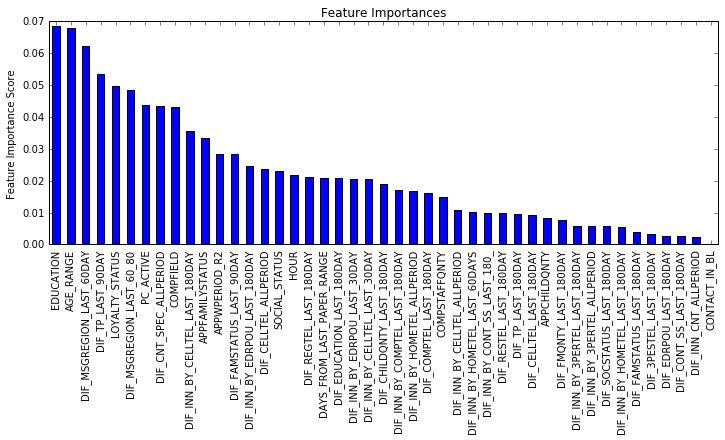

In [32]:
train_sub = train2[rfefeature]
model = GradientBoostingClassifier(random_state=10)
modelfit(model, train_sub, target)

# Baseline Model using Univariate Selection features

C:\Users\jiaqil\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Model Report
Accuracy : 0.9897
AUC Score (Train): 0.808143
CV Score : Mean - 0.7838879 | Std - 0.007363273 | Min - 0.7745355 | Max - 0.7954566


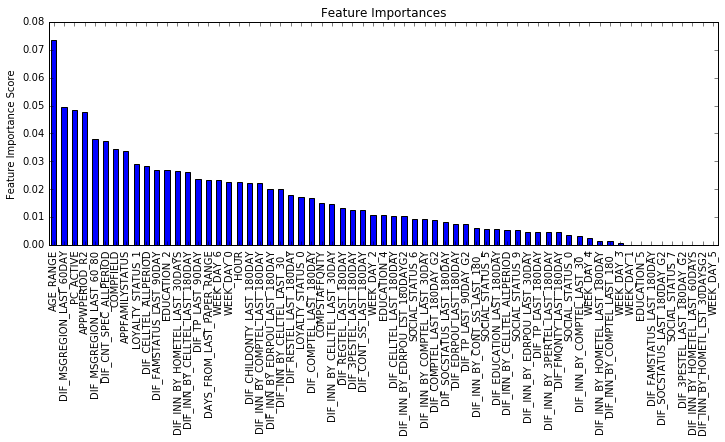

In [17]:
train_sub = train2[kbestfeature]
model = GradientBoostingClassifier(random_state=10)
modelfit(model, train_sub, target2)

# Baseline Model Using All Features

C:\Users\jiaqil\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Model Report
Accuracy : 0.9898
AUC Score (Train): 0.810849
CV Score : Mean - 0.7837371 | Std - 0.006790539 | Min - 0.7748344 | Max - 0.7951596


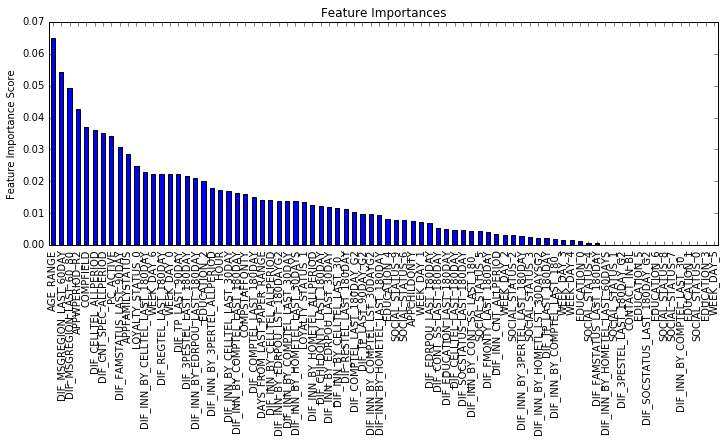

In [18]:
model = GradientBoostingClassifier(random_state=10)
modelfit(model, train2,target2)

# Tuning the model parameters

# Step 1- Find the number of estimators for a high learning rate

min_samples_split = 500 : ~0.5-1% of total values. Since this is imbalanced class problem, we'll take small value
min_samples_leaf = 50 : Just using for preventing overfitting. will be tuned later.
max_depth = 8 : since high number of observations and predictors, choose relatively high value
max_features = 'sqrt' : general thumbrule to start with
subsample = 0.8 : typically used value (will be tuned later)
0.1 is assumed to be a good learning rate to start with. Let's try to find the optimum number of estimators requried for this.

In [19]:
c,r =target2.shape

estimator = {'n_estimators':list(range(20,81,10))}
est_search = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=500,\
                       min_samples_leaf=50,max_depth=8,max_features='sqrt', subsample=0.8,random_state=10), 
                       param_grid = estimator, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
est_search.fit(train2,target2.values.reshape(c,))

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=8, max_features='sqrt', max_leaf_nodes=None,
              min_samples_leaf=50, min_samples_split=500,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=10, subsample=0.8, verbose=0,
              warm_start=False),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'n_estimators': [20, 30, 40, 50, 60, 70, 80]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [20]:
est_search.grid_scores_, est_search.best_params_, est_search.best_score_

([mean: 0.77721, std: 0.00956, params: {'n_estimators': 20},
  mean: 0.78289, std: 0.00630, params: {'n_estimators': 30},
  mean: 0.78665, std: 0.00620, params: {'n_estimators': 40},
  mean: 0.78781, std: 0.00629, params: {'n_estimators': 50},
  mean: 0.78798, std: 0.00614, params: {'n_estimators': 60},
  mean: 0.78774, std: 0.00592, params: {'n_estimators': 70},
  mean: 0.78706, std: 0.00509, params: {'n_estimators': 80}],
 {'n_estimators': 60},
 0.78797746848280381)

# Step 2- Tune tree-specific parameters

Tune max_depth and num_samples_split
Tune min_samples_leaf
Tune max_features

In [14]:
#Grid seach on 'max_depth': 7, 'min_samples_split': 1000
c,r =target2.shape
estimator2 = {'max_depth':list(range(5,16,2)), 'min_samples_split':list(range(200,1001,200))}
est_search2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60,
                                                max_features='sqrt', subsample=0.8, random_state=10), 
                       param_grid = estimator2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
est_search2.fit(train2[kbestfeature],target2.values.reshape(c,))

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=3, max_features='sqrt', max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=60,
              presort='auto', random_state=10, subsample=0.8, verbose=0,
              warm_start=False),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'min_samples_split': [200, 400, 600, 800, 1000], 'max_depth': [5, 7, 9, 11, 13, 15]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [15]:
est_search2.grid_scores_, est_search2.best_params_, est_search2.best_score_

([mean: 0.77635, std: 0.00955, params: {'min_samples_split': 200, 'max_depth': 5},
  mean: 0.77583, std: 0.00992, params: {'min_samples_split': 400, 'max_depth': 5},
  mean: 0.77690, std: 0.00857, params: {'min_samples_split': 600, 'max_depth': 5},
  mean: 0.77622, std: 0.00860, params: {'min_samples_split': 800, 'max_depth': 5},
  mean: 0.77757, std: 0.00860, params: {'min_samples_split': 1000, 'max_depth': 5},
  mean: 0.77732, std: 0.00910, params: {'min_samples_split': 200, 'max_depth': 7},
  mean: 0.77468, std: 0.00905, params: {'min_samples_split': 400, 'max_depth': 7},
  mean: 0.77944, std: 0.01091, params: {'min_samples_split': 600, 'max_depth': 7},
  mean: 0.77750, std: 0.00979, params: {'min_samples_split': 800, 'max_depth': 7},
  mean: 0.77987, std: 0.01057, params: {'min_samples_split': 1000, 'max_depth': 7},
  mean: 0.77135, std: 0.00962, params: {'min_samples_split': 200, 'max_depth': 9},
  mean: 0.77370, std: 0.00845, params: {'min_samples_split': 400, 'max_depth': 9},
  

In [61]:
#Grid seach on  {'min_samples_leaf': 50, 'min_samples_split': 1600}
est_search3 = {'min_samples_split':list(range(800,2000,200)), 'min_samples_leaf':list(range(30,100,10))}
est_search3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60,max_depth=7,
                                                    max_features='sqrt', subsample=0.8, random_state=10), 
                       param_grid = est_search3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
est_search3.fit(train2[kbestfeature],target.values.reshape(c,))

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=7, max_features='sqrt', max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=60,
              presort='auto', random_state=10, subsample=0.8, verbose=0,
              warm_start=False),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'min_samples_leaf': [30, 40, 50, 60, 70, 80, 90], 'min_samples_split': [800, 1000, 1200, 1400, 1600, 1800]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [62]:
est_search3.grid_scores_, est_search3.best_params_, est_search3.best_score_

([mean: 0.77689, std: 0.00859, params: {'min_samples_leaf': 30, 'min_samples_split': 800},
  mean: 0.77729, std: 0.00601, params: {'min_samples_leaf': 30, 'min_samples_split': 1000},
  mean: 0.77909, std: 0.00673, params: {'min_samples_leaf': 30, 'min_samples_split': 1200},
  mean: 0.77831, std: 0.00638, params: {'min_samples_leaf': 30, 'min_samples_split': 1400},
  mean: 0.77807, std: 0.00780, params: {'min_samples_leaf': 30, 'min_samples_split': 1600},
  mean: 0.77847, std: 0.00805, params: {'min_samples_leaf': 30, 'min_samples_split': 1800},
  mean: 0.77848, std: 0.00673, params: {'min_samples_leaf': 40, 'min_samples_split': 800},
  mean: 0.77827, std: 0.00694, params: {'min_samples_leaf': 40, 'min_samples_split': 1000},
  mean: 0.77746, std: 0.00807, params: {'min_samples_leaf': 40, 'min_samples_split': 1200},
  mean: 0.77797, std: 0.00589, params: {'min_samples_leaf': 40, 'min_samples_split': 1400},
  mean: 0.77903, std: 0.00715, params: {'min_samples_leaf': 40, 'min_samples_split

In [66]:
#Grid search max_features
est_search4= {'max_features':list(range(6,40,2))}
est_search4 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60,max_depth=7,
                        min_samples_split=1600, min_samples_leaf=50, subsample=0.8, random_state=10), 
                       param_grid = est_search4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
est_search4.fit(train2[kbestfeature],target.values.reshape(c,))

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=7, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=50, min_samples_split=1600,
              min_weight_fraction_leaf=0.0, n_estimators=60,
              presort='auto', random_state=10, subsample=0.8, verbose=0,
              warm_start=False),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'max_features': [6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [68]:
est_search4.grid_scores_, est_search4.best_params_, est_search4.best_score_

([mean: 0.78023, std: 0.00809, params: {'max_features': 6},
  mean: 0.77797, std: 0.00593, params: {'max_features': 8},
  mean: 0.77641, std: 0.00777, params: {'max_features': 10},
  mean: 0.77724, std: 0.00824, params: {'max_features': 12},
  mean: 0.78000, std: 0.00499, params: {'max_features': 14},
  mean: 0.77904, std: 0.00770, params: {'max_features': 16},
  mean: 0.77764, std: 0.00631, params: {'max_features': 18},
  mean: 0.77868, std: 0.00713, params: {'max_features': 20},
  mean: 0.77933, std: 0.00686, params: {'max_features': 22},
  mean: 0.78029, std: 0.00642, params: {'max_features': 24},
  mean: 0.77783, std: 0.00677, params: {'max_features': 26},
  mean: 0.77768, std: 0.00527, params: {'max_features': 28},
  mean: 0.77700, std: 0.00639, params: {'max_features': 30},
  mean: 0.77990, std: 0.00637, params: {'max_features': 32},
  mean: 0.77792, std: 0.00582, params: {'max_features': 34},
  mean: 0.77938, std: 0.00474, params: {'max_features': 36},
  mean: 0.77705, std: 0.00

In [69]:
#Grid Search on subsample': 0.75
estimator5 = {'subsample':[0.6,0.7,0.75,0.8,0.85,0.9]}
est_search5 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60,max_depth=7, 
                            min_samples_split=1600, min_samples_leaf=50, subsample=0.8, random_state=10, max_features=24),
                       param_grid = estimator5, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
est_search5.fit(train2[kbestfeature],target.values.reshape(c,))

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=7, max_features=24, max_leaf_nodes=None,
              min_samples_leaf=50, min_samples_split=1600,
              min_weight_fraction_leaf=0.0, n_estimators=60,
              presort='auto', random_state=10, subsample=0.8, verbose=0,
              warm_start=False),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'subsample': [0.6, 0.7, 0.75, 0.8, 0.85, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [70]:
est_search5.grid_scores_, est_search5.best_params_, est_search5.best_score_

([mean: 0.77579, std: 0.00629, params: {'subsample': 0.6},
  mean: 0.77687, std: 0.00741, params: {'subsample': 0.7},
  mean: 0.78076, std: 0.00781, params: {'subsample': 0.75},
  mean: 0.78029, std: 0.00642, params: {'subsample': 0.8},
  mean: 0.77980, std: 0.00525, params: {'subsample': 0.85},
  mean: 0.77960, std: 0.00661, params: {'subsample': 0.9}],
 {'subsample': 0.75},
 0.78075957159821563)

# Tune the Learning Rate

C:\Users\jiaqil\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Model Report
Accuracy : 0.9896
AUC Score (Train): 0.838800
CV Score : Mean - 0.7863468 | Std - 0.006260485 | Min - 0.7757783 | Max - 0.7941119


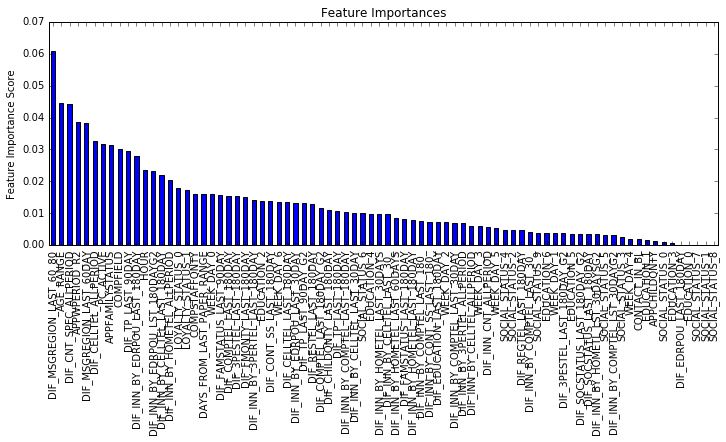

In [16]:

model_tuned2 = GradientBoostingClassifier(learning_rate=0.005, n_estimators=1200, max_depth=7, min_samples_split=1600, 
                                         min_samples_leaf=50, subsample=0.75, random_state=10, max_features=24)
modelfit(model_tuned2,train2,target2)

In [56]:
def modelfit(alg, train, target, performCV=True, printFeatureImportance=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(train, target)
    train_predictions = alg.predict(train)
   
    train_predprob = alg.predict_proba(train)[:,1]
    c,r =target.shape
    #target.values.reshape(c,)
    if performCV:
        cv_score = cross_validation.cross_val_score(alg,train.values,target.values.reshape(c,), cv=5, scoring='roc_auc')
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.accuracy_score(target.values, train_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(target, train_predprob))
    
    if performCV:
        print ("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
        
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, list(train.columns.values)).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')

# GBDT Tuned Model Perform on Test Data Set

In [57]:

test = df2[df2['Test']==0]
test_target = test[['TARGET']]
test= test.loc[:, list(set(df2.columns.values)-set(['TARGET','Test']))]

C:\Users\jiaqil\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Model Report
Accuracy : 0.99
AUC Score (Train): 0.884125
CV Score : Mean - 0.7777595 | Std - 0.02181214 | Min - 0.7457264 | Max - 0.8081906


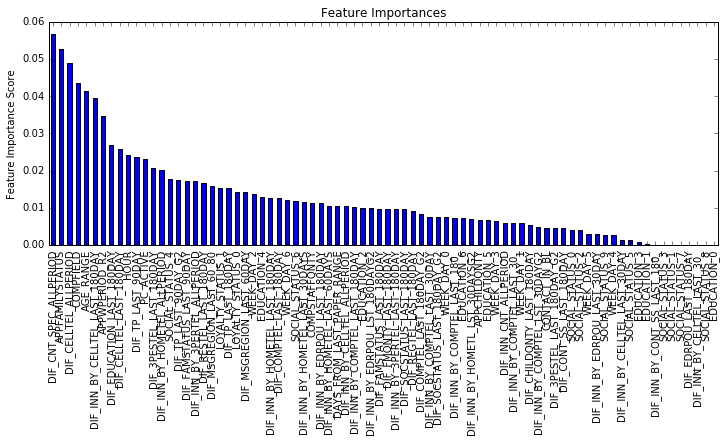

In [58]:
model_tuned2 = GradientBoostingClassifier(learning_rate=0.005, n_estimators=1200, max_depth=7, min_samples_split=1600, 
                                         min_samples_leaf=50, subsample=0.75, random_state=10, max_features=24)
modelfit(model_tuned2,test,test_target)

In [61]:
train_predictions = model_tuned2.predict(test)

In [65]:
len(list(train_predictions))


45164

In [67]:
list(train_predictions).count(0)

45163

# Use Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score

In [20]:
log= LogisticRegression()
log = log.fit(train2, target2)

C:\Users\jiaqil\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [21]:
# Logistic Regression Accuracy 
log.score(train2,target2)

0.98963260581642531

In [22]:
target2.mean()

TARGET    0.010362
dtype: float64

In [23]:
predicted = log.predict(train2)
probs = log.predict_proba(train2)
print(metrics.accuracy_score(target2, predicted))
print(metrics.roc_auc_score(target2, probs[:, 1]))

0.989632605816
0.763690752416


In [141]:
target2['TARGET'].value_counts()
print("Target 0 Percentage: ", float(178060/len(train2)))

Target 0 Percentage:  0.9898821436513231


# Logistic Baseline Cross Val ROC Score

In [143]:
c,r =target2.shape
scores = cross_val_score(LogisticRegression(), train2, target2.values.reshape(c,), scoring='roc_auc', cv=10)
print(scores)
print(scores.mean())

[ 0.80210631  0.76372762  0.69292068  0.78524108  0.75940879  0.77212784
  0.74951106  0.7649772   0.79434608  0.69154474]
0.757591141028


In [152]:
predicted = log.predict(test)
probs = log.predict_proba(test)

print(metrics.accuracy_score(test_target, predicted))
print(metrics.roc_auc_score(test_target, probs[:, 1]))

0.98895113601
0.744583177129


In [153]:
print(metrics.confusion_matrix(test_target, predicted))
print(metrics.classification_report(test_target, predicted))

[[44485     1]
 [  496     0]]
             precision    recall  f1-score   support

          0       0.99      1.00      0.99     44486
          1       0.00      0.00      0.00       496

avg / total       0.98      0.99      0.98     44982



# Load The Cleaned-up & Encoded Assesment Dataset

In [37]:
assess = pd.read_csv("C:/Users/jiaqil/Desktop/Things/credit_risk/assessment_encode.csv")

In [ ]:
model = GradientBoostingClassifier(learning_rate=0.005, n_estimators=1200, max_depth=7, min_samples_split=1600, 
                                         min_samples_leaf=50, subsample=0.75, random_state=10, max_features=24)

In [39]:
model_tuned2

assess_predictions = model_tuned2.predict(assess.iloc[:,1:])
assess_predprob = model_tuned2.predict_proba(assess.iloc[:,1:])[:,1]



In [41]:
assess_predprob 

array([ 0.01244492,  0.02709171,  0.01943619, ...,  0.02983286,
        0.01657037,  0.02354347])

In [44]:
pred_df = pd.DataFrame(assess.iloc[:,0], columns=['ID2'])

In [46]:
pred_df['Target Prediction'] = assess_predictions

In [47]:
pred_df['Target Pred Prob'] = assess_predprob

In [49]:
pred_df['Target Prediction'].value_counts()

0    134014
Name: Target Prediction, dtype: int64

In [68]:
pred_df.to_csv("C:/Users/jiaqil/Desktop/Things/credit_risk/prediction.csv")